In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import xgboost
import lightgbm
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/hj/Documents/무제/주조공정/casting.csv', encoding='cp949', index_col=0)
df.head()

,line,name,mold_name,time,date,count,working,emergency_stop,molten_temp,facility_operation_cycleTime,...,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,registration_time,passorfail,tryshot_signal,mold_code,heating_furnace
0,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:06,258,가동,ON,731.0,119,...,1449.0,550.0,700.0,34.0,23,2019-01-02 16:45:06,0.0,NaN,8722,NaN
1,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:08,243,가동,ON,720.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:08,0.0,NaN,8412,B
2,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:45:58,244,가동,ON,721.0,98,...,NaN,481.0,0.0,30.0,25,2019-01-02 16:45:58,0.0,NaN,8412,B
3,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:48:03,245,가동,ON,721.0,100,...,NaN,483.0,0.0,30.0,25,2019-01-02 16:48:03,0.0,NaN,8412,B
4,전자교반 3라인 2호기,TM Carrier RH,TM Carrier RH-Semi-Solid DIE-06,2019-01-02,16:50:08,246,가동,ON,721.0,99,...,NaN,486.0,0.0,30.0,25,2019-01-02 16:50:08,0.0,NaN,8412,B


In [3]:
df.dropna(subset=['passorfail'], inplace=True)

In [4]:
pass_count = len(df[df['passorfail']==0])
fail_count = len(df[df['passorfail']==1])

print("양품 개수:", pass_count)
print("불량 개수:", fail_count)
print("불량품: ", fail_count/(fail_count + pass_count) * 100)

양품 개수: 87998
불량 개수: 4016
불량품:  4.364553220162149


In [5]:
use_col = df.dtypes[df.dtypes!='object'].index
df = df[use_col]
df

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,198.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,268.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,276.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,83.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,83.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,79.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,82.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [6]:
df_copy = df.copy()
df_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,molten_volume,cast_pressure,biscuit_thickness,upper_mold_temp1,...,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,75.0,331.0,35.0,198.0,...,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,243,720.0,98,125,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
2,244,721.0,98,122,109.0,109.0,NaN,309.0,48.0,250.0,...,NaN,208.0,163.0,NaN,481.0,0.0,30.0,25,0.0,8412
3,245,721.0,100,125,112.0,109.0,NaN,308.0,49.0,268.0,...,NaN,211.0,179.0,NaN,483.0,0.0,30.0,25,0.0,8412
4,246,721.0,99,123,109.0,110.0,NaN,309.0,49.0,276.0,...,NaN,216.0,187.0,NaN,486.0,0.0,30.0,25,0.0,8412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92010,71,731.0,122,122,100.0,101.0,NaN,331.0,49.0,83.0,...,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
92011,72,731.0,120,121,100.0,101.0,NaN,331.0,54.0,83.0,...,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
92012,73,732.0,122,135,100.0,101.0,NaN,331.0,52.0,79.0,...,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
92013,74,732.0,133,122,100.0,101.0,NaN,331.0,53.0,82.0,...,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [7]:
df_copy.columns

Index(['count', 'molten_temp', 'facility_operation_cycleTime',
       'production_cycletime', 'low_section_speed', 'high_section_speed',
       'molten_volume', 'cast_pressure', 'biscuit_thickness',
       'upper_mold_temp1', 'upper_mold_temp2', 'upper_mold_temp3',
       'lower_mold_temp1', 'lower_mold_temp2', 'lower_mold_temp3',
       'sleeve_temperature', 'physical_strength', 'Coolant_temperature',
       'EMS_operation_time', 'passorfail', 'mold_code'],
      dtype='object')

In [8]:
df_copy.shape

(92014, 21)

In [9]:
df_copy.isnull().sum()

count                               0
molten_temp                      2261
facility_operation_cycleTime        0
production_cycletime                0
low_section_speed                   0
high_section_speed                  0
molten_volume                   45130
cast_pressure                       0
biscuit_thickness                   0
upper_mold_temp1                    0
upper_mold_temp2                    0
upper_mold_temp3                  312
lower_mold_temp1                    0
lower_mold_temp2                    0
lower_mold_temp3                  312
sleeve_temperature                  0
physical_strength                   0
Coolant_temperature                 0
EMS_operation_time                  0
passorfail                          0
mold_code                           0
dtype: int64

In [10]:
df_copy.drop('molten_volume', axis=1, inplace=True)
df_copy.dropna(axis=0, inplace=True)
df_copy.reset_index(drop=True, inplace=True) # dropna로 인한 인덱스 꼬임 방지를 위해 reset_index()로 인덱스번호 초기화
df_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,258,731.0,119,120,110.0,112.0,331.0,35.0,198.0,116.0,1449.0,234.0,316.0,1449.0,550.0,700.0,34.0,23,0.0,8722
1,73,731.0,119,120,109.0,125.0,177.0,48.0,24.0,33.0,1449.0,30.0,273.0,1449.0,479.0,708.0,35.0,23,1.0,8722
2,1,731.0,119,123,109.0,112.0,176.0,49.0,26.0,55.0,1449.0,30.0,323.0,1449.0,513.0,700.0,35.0,23,1.0,8722
3,2,731.0,119,124,109.0,112.0,331.0,47.0,31.0,65.0,1449.0,30.0,343.0,1449.0,531.0,708.0,34.0,23,1.0,8722
4,3,731.0,120,124,110.0,112.0,331.0,46.0,36.0,73.0,1449.0,31.0,343.0,1449.0,544.0,707.0,34.0,23,1.0,8722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89436,71,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
89437,72,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
89438,73,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
89439,74,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [11]:
df_copy.isnull().sum()

count                           0
molten_temp                     0
facility_operation_cycleTime    0
production_cycletime            0
low_section_speed               0
high_section_speed              0
cast_pressure                   0
biscuit_thickness               0
upper_mold_temp1                0
upper_mold_temp2                0
upper_mold_temp3                0
lower_mold_temp1                0
lower_mold_temp2                0
lower_mold_temp3                0
sleeve_temperature              0
physical_strength               0
Coolant_temperature             0
EMS_operation_time              0
passorfail                      0
mold_code                       0
dtype: int64

In [12]:
# 변수들에 존재하는 이상치를 상하한 0.1% 에 해당하는 값으로 제거함

for col in df_copy.dtypes[df_copy.dtypes!='object'].index:
    UCL = np.percentile(df_copy[col], 99.9)
    LCL = np.percentile(df_copy[col], 0.1)
    df_copy = df_copy[(df_copy[col] <= UCL) & (df_copy[col] >= LCL)]

df_copy.reset_index(drop=True, inplace=True)
df_copy

,count,molten_temp,facility_operation_cycleTime,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,32,729.0,127,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0,8722
1,2,729.0,126,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0,8573
2,3,730.0,126,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0,8573
3,4,731.0,126,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,23,1.0,8573
4,5,731.0,126,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,23,1.0,8573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,71,731.0,122,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
87255,72,731.0,120,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
87256,73,732.0,122,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
87257,74,732.0,133,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [13]:
t_test = []
for i, col in enumerate(df_copy.columns):
    t=scipy.stats.ttest_ind(df_copy[df_copy['passorfail']==1][col], df_copy[df_copy['passorfail']==0][col], equal_var=False)
    t_test.append([col, t[0], t[1]])

df_ttest = pd.DataFrame(t_test, columns=['col', 'tvalue', 'pvalue'])

use_t_list = []
for i in range(len(df_ttest)):
    if df_ttest['pvalue'][i] < 0.1:
        use_t_list.append(df_ttest['col'][i])

df_ttest

,col,tvalue,pvalue
0,count,-45.044308,0.000000e+00
1,molten_temp,3.786891,1.552251e-04
2,facility_operation_cycleTime,0.830063,4.065656e-01
3,production_cycletime,-16.718089,3.974998e-60
4,low_section_speed,-17.048564,2.804018e-62
5,high_section_speed,7.086440,1.706243e-12
6,cast_pressure,-63.993068,0.000000e+00
7,biscuit_thickness,3.641038,2.761401e-04
8,upper_mold_temp1,-48.991533,0.000000e+00
9,upper_mold_temp2,-51.139842,0.000000e+00


In [14]:
df_copy = df_copy[use_t_list]
df_copy

,count,molten_temp,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail,mold_code
0,32,729.0,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0,8722
1,2,729.0,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0,8573
2,3,730.0,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0,8573
3,4,731.0,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,23,1.0,8573
4,5,731.0,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,23,1.0,8573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,71,731.0,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0,8917
87255,72,731.0,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0,8917
87256,73,732.0,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0,8917
87257,74,732.0,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0,8917


In [15]:
df_copy.drop(['count', 'mold_code'], axis=1, inplace=True)
df_copy

,molten_temp,production_cycletime,low_section_speed,high_section_speed,cast_pressure,biscuit_thickness,upper_mold_temp1,upper_mold_temp2,upper_mold_temp3,lower_mold_temp1,lower_mold_temp2,lower_mold_temp3,sleeve_temperature,physical_strength,Coolant_temperature,EMS_operation_time,passorfail
0,729.0,128,109.0,112.0,330.0,45.0,142.0,74.0,1449.0,162.0,206.0,1449.0,515.0,707.0,36.0,23,0.0
1,729.0,82,110.0,112.0,158.0,53.0,168.0,116.0,101.0,127.0,128.0,1449.0,515.0,715.0,24.0,23,1.0
2,730.0,129,110.0,112.0,185.0,56.0,194.0,133.0,106.0,148.0,146.0,1449.0,529.0,705.0,25.0,23,1.0
3,731.0,84,110.0,112.0,191.0,56.0,212.0,146.0,113.0,163.0,159.0,1449.0,530.0,715.0,26.0,23,1.0
4,731.0,87,110.0,112.0,189.0,57.0,216.0,153.0,119.0,171.0,167.0,1449.0,528.0,713.0,26.0,23,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87254,731.0,122,100.0,101.0,331.0,49.0,83.0,183.0,1449.0,231.0,201.0,1449.0,279.0,726.0,30.0,0,0.0
87255,731.0,121,100.0,101.0,331.0,54.0,83.0,184.0,1449.0,232.0,201.0,1449.0,279.0,732.0,30.0,0,0.0
87256,732.0,135,100.0,101.0,331.0,52.0,79.0,184.0,1449.0,225.0,195.0,1449.0,272.0,731.0,30.0,0,0.0
87257,732.0,122,100.0,101.0,331.0,53.0,82.0,185.0,1449.0,227.0,199.0,1449.0,288.0,723.0,30.0,0,0.0


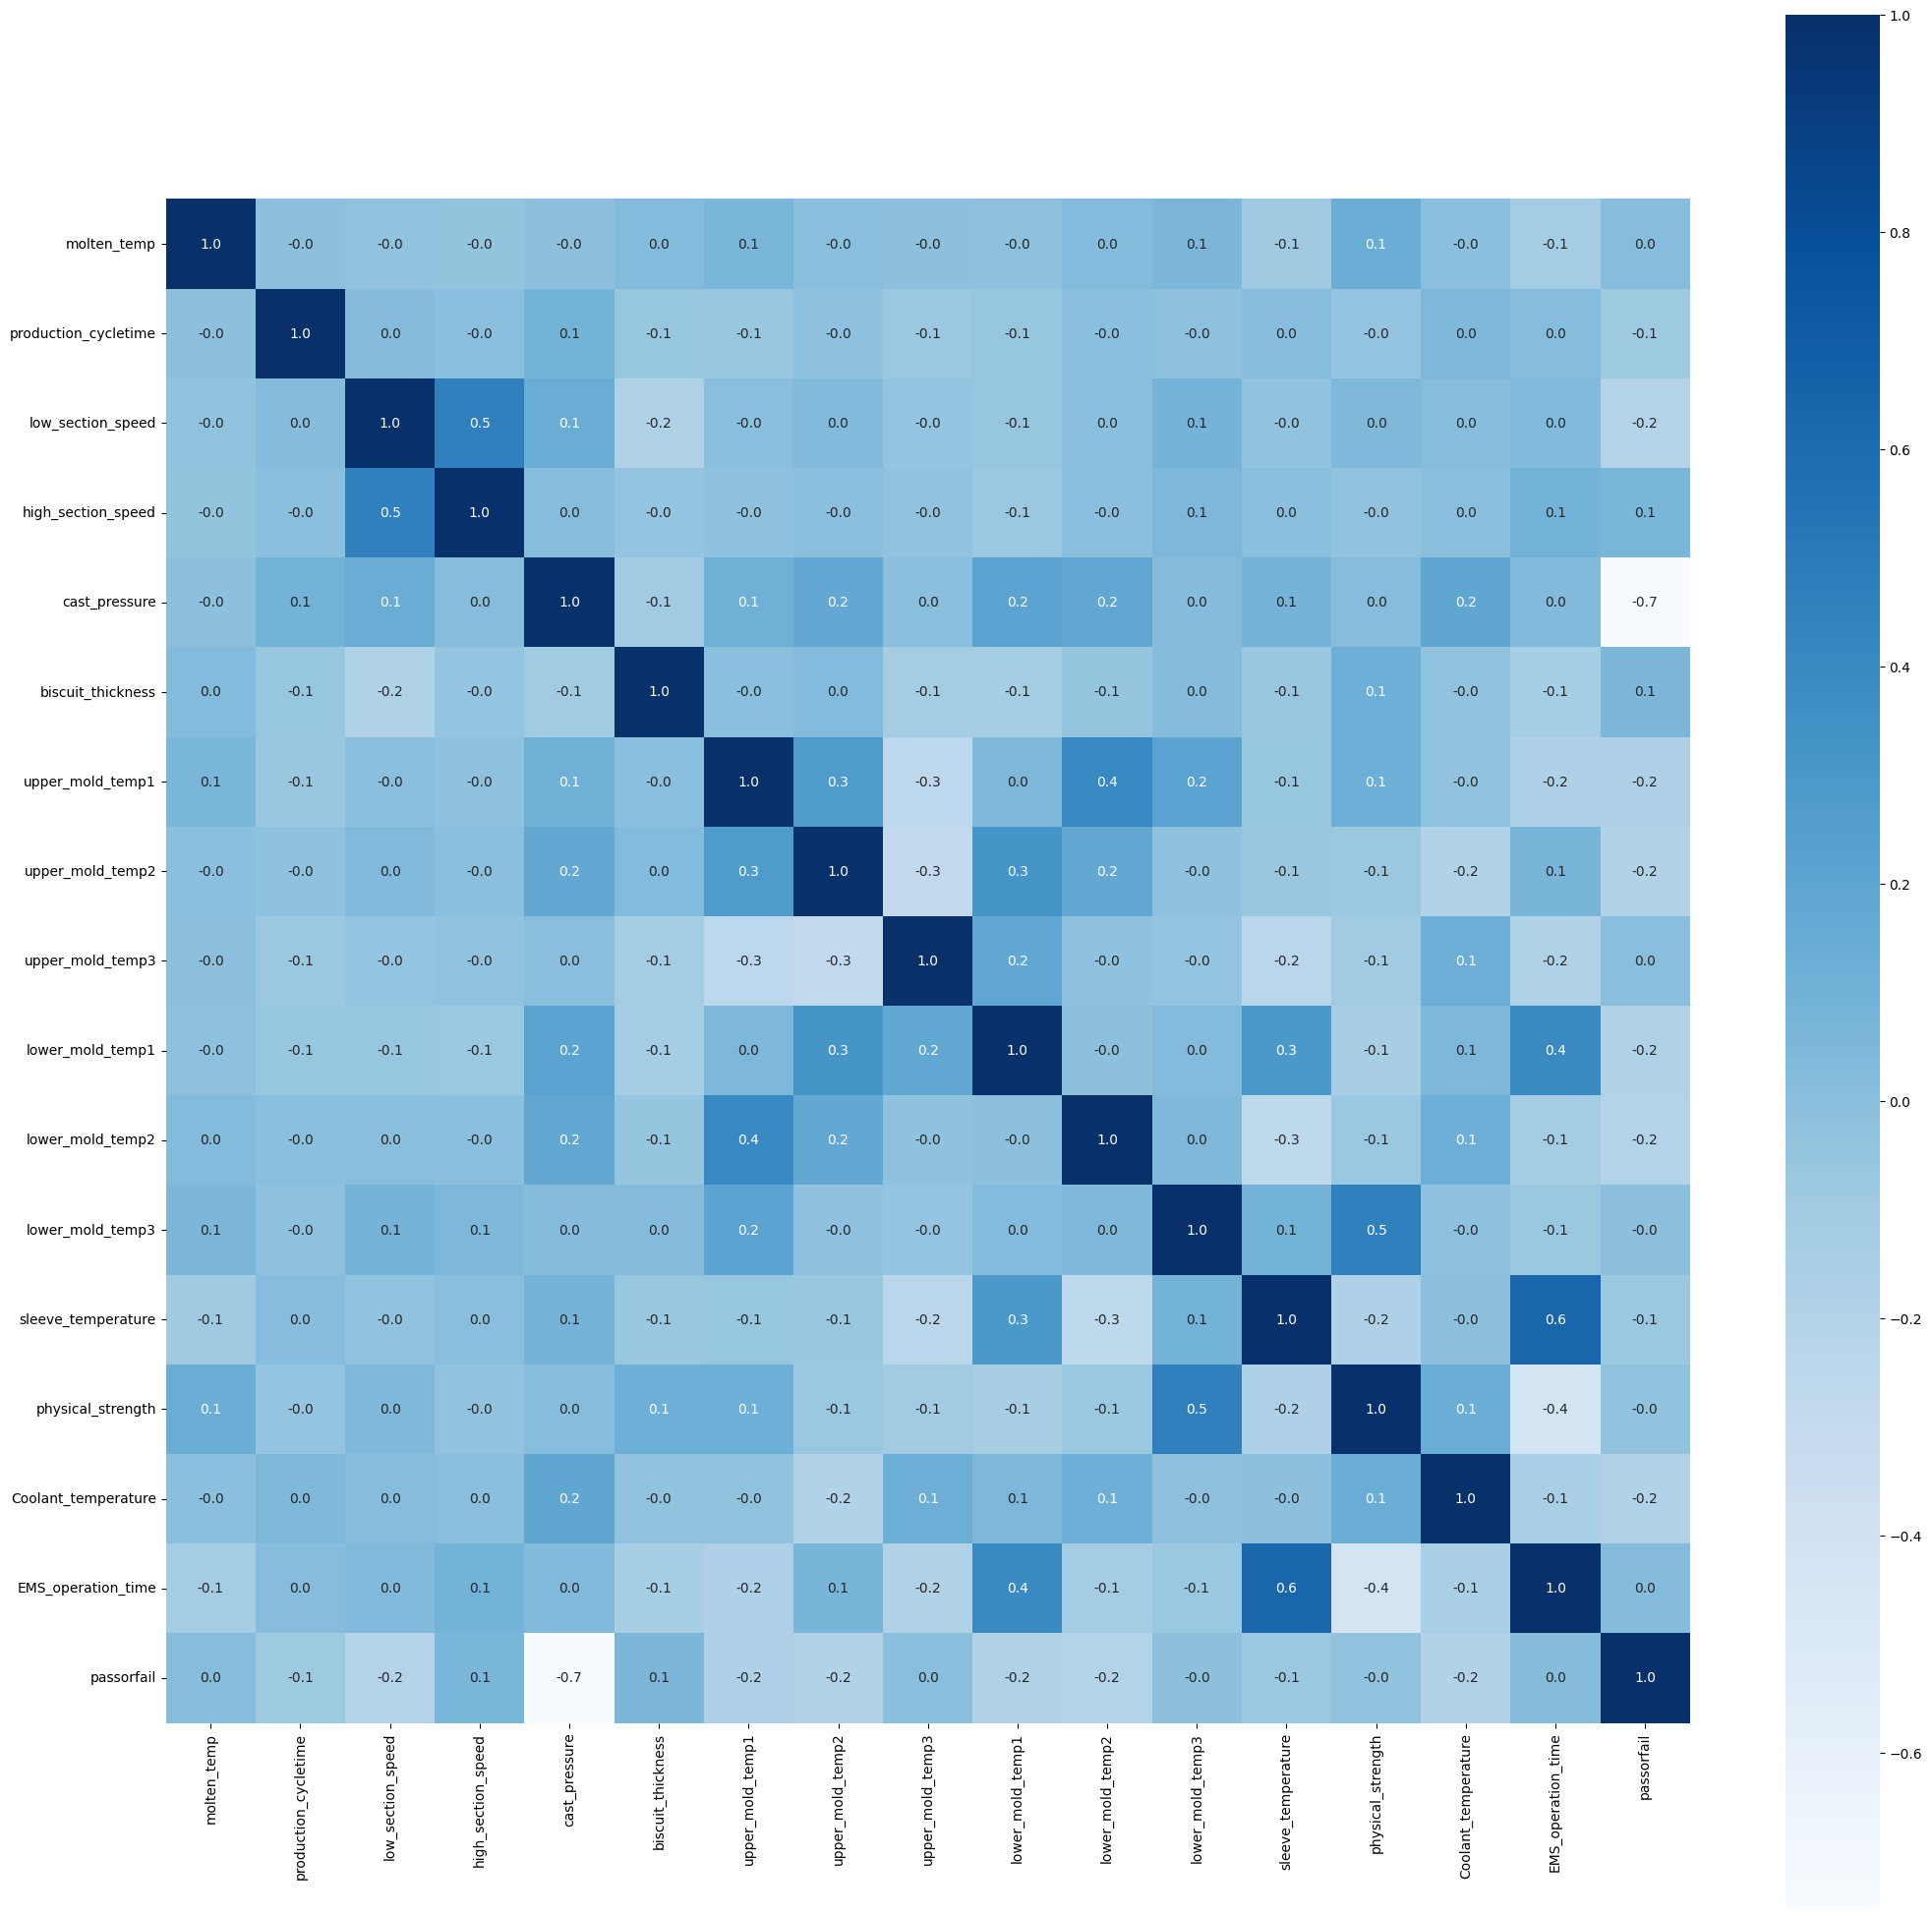

In [16]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_copy.corr(), annot = True, fmt = '.1f', square = True, cmap = 'Blues')
plt.show()

In [17]:
from pycaret.classification import *

In [18]:
clf_test_1 = setup(data=df_copy,
                   target='passorfail',
                   session_id = 123,  # 실험의 재현성과 관리를 위함
                   data_split_shuffle = True,
                   transformation = True,  # 정규분포를 위해 데이터 변환 (?)
                   remove_outliers = True,  # 이상치 제거
                   feature_selection = True,  # 불필요한 특성 제거
                   normalize = True, # 데이터 스케일 조정하여 모든 특성이 동일한 범위에 있도록 정규화
                   fix_imbalance = True) # 타겟 클래스의 불균형을 해결하기 위해 샘플링 기법 사용. 오버샘플링하거나 언더 샘플링 기법
                   
                   

[LightGBM] [Info] Number of positive: 57155, number of negative: 57155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001852 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3423
[LightGBM] [Info] Number of data points in the train set: 114310, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Description,Value
0,Session id,123
1,Target,passorfail
2,Target type,Binary
3,Original data shape,"(87259, 17)"
4,Transformed data shape,"(140488, 4)"
5,Transformed train set shape,"(114310, 4)"
6,Transformed test set shape,"(26178, 4)"
7,Numeric features,16
8,Preprocess,True
9,Imputation type,simple


In [19]:
clf_test_1.train_transformed

,cast_pressure,biscuit_thickness,lower_mold_temp2,passorfail
44902,0.265029,-0.151737,-0.042647,0.0
9229,0.819470,0.062546,-0.920861,0.0
38354,0.395845,0.466110,-0.513114,0.0
69571,0.265029,0.466110,2.014509,0.0
53893,-0.210906,-0.151737,1.453675,0.0
...,...,...,...,...
143516,0.395845,-1.810787,-0.525268,1.0
143517,0.482533,-3.236773,0.179140,1.0
143518,0.339554,1.139359,-0.086044,1.0
143519,-1.537847,1.185819,-0.065757,1.0


In [20]:
top5_models = compare_models(fold=5, round=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.979,0.000,0.551,0.753,0.624,0.614,0.628,3.180
lightgbm,Light Gradient Boosting Machine,0.977,0.000,0.622,0.665,0.635,0.624,0.628,1.168
rf,Random Forest Classifier,0.975,0.000,0.602,0.628,0.608,0.596,0.599,1.468
et,Extra Trees Classifier,0.973,0.000,0.628,0.580,0.599,0.585,0.587,1.092
xgboost,Extreme Gradient Boosting,0.973,0.000,0.616,0.590,0.598,0.584,0.587,0.782
dt,Decision Tree Classifier,0.972,0.000,0.539,0.590,0.560,0.546,0.548,0.786
dummy,Dummy Classifier,0.966,0.000,0.000,0.000,0.000,0.000,0.000,0.732
gbc,Gradient Boosting Classifier,0.938,0.000,0.707,0.321,0.440,0.412,0.449,1.924
knn,K Neighbors Classifier,0.937,0.000,0.724,0.317,0.441,0.413,0.453,0.866
ada,Ada Boost Classifier,0.858,0.000,0.792,0.171,0.281,0.238,0.325,0.998


In [29]:
top5_models

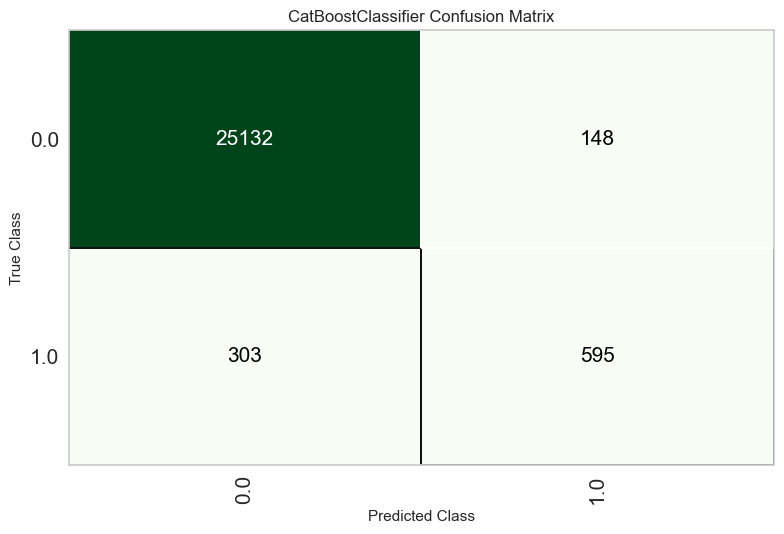

In [21]:
plot_model(top5_models, 'confusion_matrix')

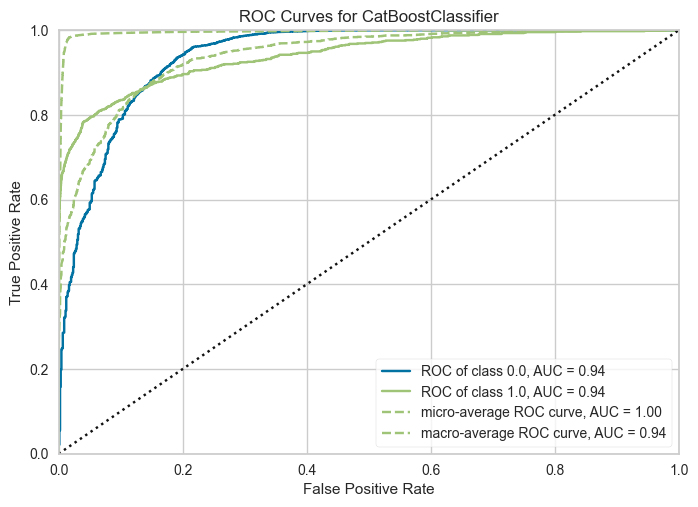

In [22]:

plot_model(top5_models, 'auc')

In [23]:
# tune_model = tune_model(top5_models, optimize = 'F1')

In [24]:
total_models = []
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [25]:
model_lightgbm = create_model('lightgbm', fold=5)
total_models.append(model_lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9801,0.0000,0.7160,0.7075,0.7117,0.7014,0.7015
1,0.9674,0.0000,0.2871,0.5455,0.3762,0.3611,0.3808
2,0.9795,0.0000,0.6826,0.7079,0.6950,0.6844,0.6845
3,0.9797,0.0000,0.7160,0.6993,0.7075,0.6970,0.6971
4,0.9777,0.0000,0.7088,0.6644,0.6859,0.6744,0.6748
Mean,0.9769,0.0000,0.6221,0.6649,0.6353,0.6237,0.6277
Std,0.0048,0.0000,0.1680,0.0618,0.1299,0.1316,0.1238


In [26]:
# model_lightgbm = tune_model(model_lightgbm, fold=5, optimize = 'F1', choose_better=True)

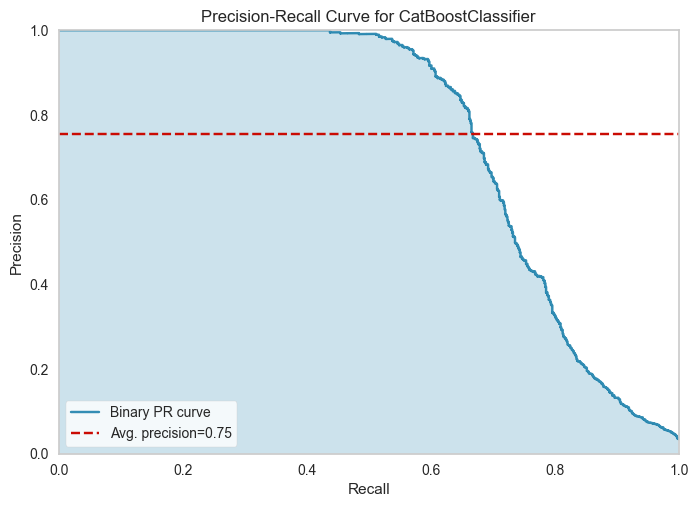

In [27]:
plot_model(top5_models, 'pr')

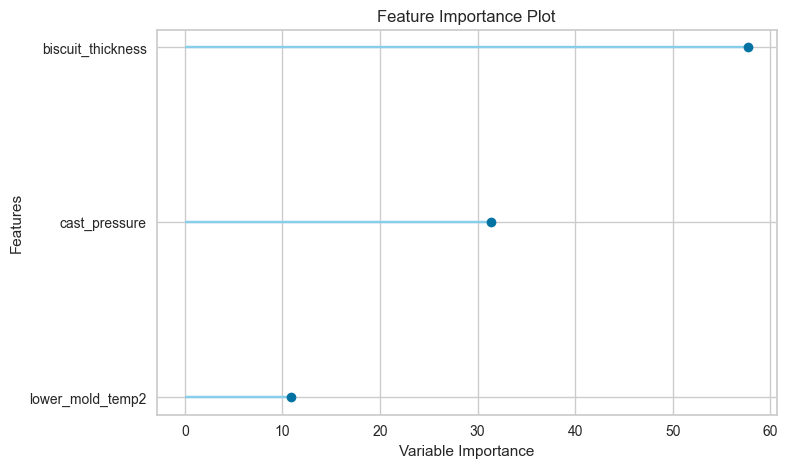

In [28]:
plot_model(top5_models, 'feature')

### Predict for validation data 

3. setup environment에서 우리는 train_size = 0.7 (default)로 설정했었습니다. 여기서 남은 0.3의 데이터를 통해 해당 모델이 어느정도의 정확성을 가지고 있는지 보여줍니다.